In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 50)
import matplotlib.pyplot as plt
import seaborn as sns

#-- plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#--

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import dataset
def load_data(loc):
    df=pd.read_csv(loc)
    return df

In [3]:
def freq_of_defects(data):
    x=data.groupby(data.columns[-1])[data.columns[0]].apply(lambda x: x.count())
    return x

In [4]:
def draw_hist(data, color="green"):
    trace = go.Histogram(x=data.iloc[:,-1], opacity=0.75, name="Check for imbalance", marker=dict(color=color))
    hist_data=[trace]

    hist_layout=go.Layout(barmode='overlay', title='Check for imbalance', xaxis=dict(title = 'True - False'), yaxis = dict(title = 'Frequency'))
    fig = go.Figure(data = hist_data, layout = hist_layout)
    iplot(fig)

In [5]:
#Correlation heatmap
def draw_heatmap(data):
    f, ax=plt.subplots(figsize=(25,15))
    sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".2f", vmin=-1, vmax=1, center=0, cmap='Spectral')
    plt.savefig('D:\\YMTS0297\\IEEE\\Software bug prediction\\Vizualizations\\heatmap.png')
    plt.show()

### Exploratory Data Analysis

##### For jm1 dataset

In [175]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\jm1.csv"
df=load_data(loc)

In [176]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11,16,76,50,7,True


In [8]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [9]:
df.shape

(10885, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [11]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [12]:
print(freq_of_defects(df))

defects
False    8779
True     2106
Name: loc, dtype: int64


In [13]:
draw_hist(df, color='green')

In [14]:
#draw_heatmap(df)

##### For cm1 dataset

In [15]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\cm1.csv"
df=load_data(loc)

In [16]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [17]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,0.304699,1938.056124,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,0.565998,7453.591519,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,0.030000,33.672500,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,0.110000,204.310000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,0.300000,924.075000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,5.710000,119649.480000,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


In [18]:
df.shape

(498, 22)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

In [20]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [21]:
print(freq_of_defects(df))

defects
False    449
True      49
Name: loc, dtype: int64


In [22]:
draw_hist(df, color='red')

In [23]:
#draw_heatmap(df)

##### For kc2 dataset

In [24]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\kc2.csv"
df=load_data(loc)

In [25]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,no
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,yes
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,2.80,48380.48,359,35,9,10,47.0,106.0,692.0,467.0,106.0,yes
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,1.24,8258.00,174,15,34,5,23.0,67.0,343.0,232.0,65.0,yes
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,1.04,5116.84,142,7,19,4,18.0,58.0,310.0,190.0,51.0,yes


In [26]:
df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,36.894828,4.893487,2.447126,3.650192,94.630843,555.472644,0.274464,9.735287,28.320441,1.854299e+04,0.188966,1094.811456,27.772031,2.000000,4.339080,0.281609,9.197701,14.465900,57.611494,37.023372,8.765134
std,77.944048,10.976772,6.665003,8.054860,233.230165,1817.468320,0.275609,11.088640,32.225597,1.132712e+05,0.608792,7556.521581,64.431485,5.582052,9.214753,1.038236,6.360180,22.086661,142.990741,90.398620,21.942779
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,1.000000,5.000000,11.610000,0.060000,1.500000,7.740000,1.741000e+01,0.000000,0.970000,2.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,2.000000,1.000000
50%,13.000000,2.000000,1.000000,2.000000,27.000000,109.205000,0.140000,6.000000,20.560000,6.135900e+02,0.040000,34.090000,8.000000,0.000000,1.000000,0.000000,8.000000,7.000000,16.500000,11.000000,3.000000
75%,45.000000,5.000000,1.000000,4.000000,104.750000,543.787500,0.500000,14.610000,38.365000,7.624085e+03,0.180000,423.562500,33.750000,2.000000,5.000000,0.000000,14.000000,20.000000,64.000000,41.000000,9.000000
max,1275.000000,180.000000,125.000000,143.000000,3982.000000,33814.560000,2.000000,103.530000,415.060000,2.147484e+06,11.270000,153047.010000,1107.000000,44.000000,121.000000,11.000000,47.000000,325.000000,2469.000000,1513.000000,361.000000


In [27]:
df.shape

(522, 22)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc               522 non-null    float64
 1   v(g)              522 non-null    float64
 2   ev(g)             522 non-null    float64
 3   iv(g)             522 non-null    float64
 4   n                 522 non-null    float64
 5   v                 522 non-null    float64
 6   l                 522 non-null    float64
 7   d                 522 non-null    float64
 8   i                 522 non-null    float64
 9   e                 522 non-null    float64
 10  b                 522 non-null    float64
 11  t                 522 non-null    float64
 12  lOCode            522 non-null    int64  
 13  lOComment         522 non-null    int64  
 14  lOBlank           522 non-null    int64  
 15  lOCodeAndComment  522 non-null    int64  
 16  uniq_Op           522 non-null    float64
 1

In [29]:
df.isnull().sum()

loc                 0
v(g)                0
ev(g)               0
iv(g)               0
n                   0
v                   0
l                   0
d                   0
i                   0
e                   0
b                   0
t                   0
lOCode              0
lOComment           0
lOBlank             0
lOCodeAndComment    0
uniq_Op             0
uniq_Opnd           0
total_Op            0
total_Opnd          0
branchCount         0
problems            0
dtype: int64

In [30]:
print(freq_of_defects(df))

problems
no     415
yes    107
Name: loc, dtype: int64


In [31]:
draw_hist(df, color='blue')

In [32]:
#draw_heatmap(df)

##### For pc3 dataset

In [33]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\pc3.csv"
df=load_data(loc)

In [34]:
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,2,1,0,0,0,0,1,0.10,0,0.00,1,1.00,1,1,0.00,10,0,27.90,7.78,1687.93,0.07,57,0.13,93.77,217.02,1.00,0,0,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,1,1.00,5,1,0.00,14,2,40.67,14.00,7972.25,0.19,107,0.07,442.90,569.45,1.00,0,0,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,2,0.18,34,1,0.00,38,0,33.74,23.20,18157.82,0.26,136,0.04,1008.77,782.66,0.09,7,13,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,4,0.44,32,6,0.63,19,2,26.33,31.74,26522.64,0.28,154,0.03,1473.48,835.64,0.67,8,14,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,1,1.00,2,1,0.00,9,0,42.25,4.43,830.35,0.06,42,0.23,46.13,187.30,1.00,0,0,3,0.06,19,23,15,7,18,18.18,9,False


In [35]:
df.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1.563000e+03,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,6.546385,9.649392,2.394114,1.317338,4.438260,15.150352,5.497761,0.288714,7.062060,1.566379,2.948816,0.709808,21.224568,2.460653,0.178445,22.017914,1.291107,37.074536,14.966583,3.407282e+04,0.261919,127.021753,0.124555,1892.934440,786.018688,0.606417,4.044146,7.637876,17.726807,0.214255,56.794626,70.227127,22.017274,12.715291,35.770313,14.340467,23.335253
std,9.193725,21.142554,2.911106,3.320541,9.182347,39.377744,10.834772,0.195155,19.025372,1.025317,4.493409,0.300364,46.219873,3.996824,0.328710,40.726277,1.205660,71.028341,15.928281,3.581659e+05,1.032265,344.347206,0.129438,19898.108073,3096.529839,0.326939,10.233383,19.799265,35.564286,0.215738,154.823532,190.845052,38.218763,6.899234,52.127212,19.546351,41.496929
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,1.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,2.000000,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.170000,0.000000,0.000000,1.000000,0.500000,5.000000,1.000000,0.000000,7.000000,0.000000,14.235000,6.000000,6.898950e+02,0.040000,27.000000,0.050000,38.330000,108.210000,0.330000,0.000000,0.000000,5.000000,0.100000,11.000000,16.000000,7.000000,8.000000,10.000000,0.000000,7.000000
50%,3.000000,5.000000,1.000000,0.000000,0.000000,8.000000,3.000000,0.250000,4.000000,2.000000,2.000000,0.750000,11.000000,1.000000,0.000000,12.000000,1.000000,24.000000,11.250000,3.178670e+03,0.090000,58.000000,0.080000,176.590000,271.410000,0.500000,2.000000,4.000000,10.000000,0.160000,25.000000,33.000000,13.000000,12.000000,20.000000,2.600000,13.000000
75%,8.500000,11.000000,3.000000,1.000000,5.000000,16.000000,6.000000,0.330000,8.000000,2.000000,3.000000,1.000000,22.000000,3.000000,0.220000,24.000000,2.000000,42.530000,19.240000,1.217108e+04,0.230000,129.500000,0.150000,676.170000,688.120000,1.000000,4.000000,8.000000,19.000000,0.250000,58.000000,72.000000,26.000000,16.000000,44.000000,25.000000,26.000000
max,77.000000,589.000000,24.000000,42.000000,78.000000,1148.000000,299.000000,1.240000,570.000000,5.000000,71.000000,1.000000,1260.000000,70.000000,1.000000,817.000000,7.000000,1535.480000,281.130000,1.275145e+07,30.950000,9605.000000,2.000000,708413.980000,92835.550000,1.000000,289.000000,574.000000,963.000000,2.000000,4015.000000,5590.000000,787.000000,68.000000,891.000000,93.940000,817.000000


In [36]:
df.shape

(1563, 38)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1563 non-null   int64  
 1   BRANCH_COUNT                     1563 non-null   int64  
 2   CALL_PAIRS                       1563 non-null   int64  
 3   LOC_CODE_AND_COMMENT             1563 non-null   int64  
 4   LOC_COMMENTS                     1563 non-null   int64  
 5   CONDITION_COUNT                  1563 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            1563 non-null   int64  
 7   CYCLOMATIC_DENSITY               1563 non-null   float64
 8   DECISION_COUNT                   1563 non-null   int64  
 9   DECISION_DENSITY                 1563 non-null   float64
 10  DESIGN_COMPLEXITY                1563 non-null   int64  
 11  DESIGN_DENSITY                   1563 non-null   float64
 12  EDGE_COUNT          

In [38]:
df.isnull().sum()

LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
M

In [39]:
print(freq_of_defects(df))

c
False    1403
True      160
Name: LOC_BLANK, dtype: int64


In [40]:
draw_hist(df, color='orange')

In [41]:
#draw_heatmap(df)

### Preprocessing (Feature scaling)
    

In [42]:
def obj_to_numeric(data_file):
    d=data_file.iloc[:,:-1]
    last_col=data_file.iloc[:,-1]
    d=d.apply(lambda x: pd.to_numeric(x, errors='coerce'))
    d[data_file.columns[-1]]=last_col
    d=d.dropna(how='any', axis=0)
    return d

In [43]:
def data_preprocessing(data):
    """
    Removing Na / Nan values.
    Normalizing all (numeric only) columns in dataset.
    
    """
    df=obj_to_numeric(data)
    
    d=pd.DataFrame(normalize(df.iloc[:,:-1]))
    d[data.columns[-1]]=df.iloc[:,-1]
    d.columns=data.columns
    return d

##### Accuracy Variables

In [44]:
accuracy={}
algorithms=['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XgBoost']
datasets=['jm1','cm1','kc2','pc3']

### jm1 dataset

In [45]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\jm1.csv"
df=load_data(loc)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11,16,76,50,7,True


In [46]:
#Scaling and null values treatment
df=data_preprocessing(df)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.165213,0.210271,0.210271,0.210271,0.195252,0.195252,1.952515e-01,0.195252,0.195252,0.195252,0.195252,0.195252,0.300387,0.300387,0.300387,0.300387,0.180232,0.180232,0.180232,0.180232,0.210271,False
1,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,2.182179e-01,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,True
2,0.003118,0.000303,0.000043,0.000260,0.008574,0.049109,2.165060e-06,0.000879,0.002418,0.997188,0.000016,0.055399,0.002208,0.000433,0.000346,0.000043,0.000736,0.001559,0.004850,0.003724,0.000563,True
3,0.002552,0.000040,0.000013,0.000040,0.008059,0.058413,8.059231e-07,0.000229,0.003423,0.996694,0.000019,0.055372,0.001733,0.000390,0.000376,0.000027,0.000228,0.001813,0.004419,0.003640,0.000067,True
4,0.003581,0.000387,0.000097,0.000387,0.012195,0.057987,5.807237e-06,0.001664,0.003374,0.996648,0.000019,0.055369,0.002710,0.000097,0.000581,0.000000,0.001065,0.001549,0.007356,0.004839,0.000678,True


### Spliting Dataset and balancing

In [47]:
def data_split(data_file):
    """
    Balanced data split (Balanced only for training dataset).
    Balanced using SMOTE.
    """
    X = data_file.iloc[:,:-1]
    y = data_file.iloc[:,-1]
    y=(y==True).astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    sm=SMOTE(random_state=12)
    X_train2, y_train2 = sm.fit_resample(X_train, y_train)
    return X_train2, X_test, y_train2, y_test

In [48]:
x_train, x_test, y_train, y_test = data_split(df)

#### Logistic Regression

In [49]:
logit_1=LogisticRegression(random_state=12, C=20, class_weight='balanced', solver='saga')
logit_1.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=20, class_weight='balanced', random_state=12,
                   solver='saga')

In [50]:
pred=logit_1.predict(x_test)

In [51]:
confusion_matrix(np.array(y_test), pred)

array([[948, 818],
       [116, 294]], dtype=int64)

In [52]:
acc=accuracy_score(y_test, pred)
acc

0.5707720588235294

In [53]:
try:
    accuracy['jm1'].append(acc)
except:
    accuracy['jm1']=[acc]

#### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
decision_1=DecisionTreeClassifier(criterion="entropy",max_depth=22)
decision_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=22)

In [56]:
pred=decision_1.predict(x_test)

In [57]:
confusion_matrix(y_test, pred)

array([[1369,  397],
       [ 228,  182]], dtype=int64)

In [58]:
acc=accuracy_score(y_test, pred)
acc

0.7127757352941176

In [59]:
try:
    accuracy['jm1'].append(acc)
except:
    accuracy['jm1']=[acc]

#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_1=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=22)
rf_1.fit(x_train,y_train)

RandomForestClassifier(max_depth=22)

In [62]:
pred=rf_1.predict(x_test)

In [63]:
confusion_matrix(y_test, pred)

array([[1503,  263],
       [ 231,  179]], dtype=int64)

In [64]:
acc=accuracy_score(y_test, pred)
acc

0.7729779411764706

In [65]:
try:
    accuracy['jm1'].append(acc)
except:
    accuracy['jm1']=[acc]

#### AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
ab_1=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20) ,n_estimators=100, learning_rate=0.008)
ab_1.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=20),
                   learning_rate=0.008, n_estimators=100)

In [68]:
pred=ab_1.predict(x_test)

In [69]:
confusion_matrix(y_test, pred)

array([[1518,  248],
       [ 233,  177]], dtype=int64)

In [70]:
acc=accuracy_score(y_test, pred)
acc

0.7789522058823529

In [71]:
try:
    accuracy['jm1'].append(acc)
except:
    accuracy['jm1']=[acc]

#### XGBoost

In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_1=xgb.XGBClassifier()
params={
    'eta':[0.03,0.04,0.05,0.06,0.07,0.08],
    'max_depth':[*range(17,22)],
    #'min_child_weight' : [ 1, 3, 5, 7, 9 ],
    'gamma':[ 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01 ],
    #"colsample_bytree" : [ 0.3, 0.4, 0.5, 0.6, 0.7 ]
}
grid=GridSearchCV(xgb_1, params, n_jobs=4, scoring='neg_log_loss', cv=2, verbose=5)
grid_result=grid.fit(x_train, y_train)

In [ ]:
grid_result.best_params_

In [73]:
model_xgb_1=xgb.XGBClassifier(n_estimators=700, max_depth=21, learning_rate=0.07, gamma=0.009, colsample_bytree=0.4)
model_xgb_1.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.009, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=21,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
pred=model_xgb_1.predict(x_test)

In [75]:
confusion_matrix(y_test, pred)

array([[1511,  255],
       [ 230,  180]], dtype=int64)

In [76]:
acc=accuracy_score(y_test, pred)
acc

0.7771139705882353

In [77]:
try:
    accuracy['jm1'].append(acc)
except:
    accuracy['jm1']=[acc]

## cm1 dataset

In [78]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\cm1.csv"
df=load_data(loc)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [79]:
#Scaling and null values treatment
df=data_preprocessing(df)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0.165213,0.210271,0.210271,0.210271,0.195252,0.195252,0.195252,0.195252,0.195252,0.195252,0.195252,0.195252,0.300387,0.300387,0.300387,0.300387,0.180232,0.180232,0.180232,0.180232,0.210271,False
1,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,True
2,0.008111,0.001690,0.000338,0.001014,0.021291,0.104473,0.000037,0.003211,0.010997,0.992504,0.000034,0.055138,0.000338,0.000000,0.002028,0.000000,0.005069,0.005069,0.014870,0.006421,0.003042,False
3,0.005779,0.001156,0.001156,0.000578,0.013581,0.062270,0.000017,0.004623,0.003892,0.996327,0.000020,0.055352,0.000000,0.000000,0.000867,0.000000,0.004623,0.002312,0.008958,0.004623,0.002023,False
4,0.003987,0.000997,0.000997,0.000332,0.011961,0.057500,0.000010,0.002879,0.003317,0.996672,0.000020,0.055371,0.000000,0.000000,0.000498,0.000000,0.002658,0.001993,0.007642,0.004319,0.001827,False


In [80]:
x_train, x_test, y_train, y_test = data_split(df)

#### Logistic Regression

In [81]:
logit_2=LogisticRegression(random_state=12, class_weight='balanced', penalty='none')
logit_2.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', penalty='none', random_state=12)

In [82]:
pred=logit_2.predict(x_test)

In [83]:
confusion_matrix(y_test, pred)

array([[64, 21],
       [ 5, 10]], dtype=int64)

In [84]:
acc=accuracy_score(y_test, pred)
acc

0.74

In [85]:
try:
    accuracy['cm1'].append(acc)
except:
    accuracy['cm1']=[acc]

#### Decision Tree

In [86]:
decision_2=DecisionTreeClassifier(criterion="entropy",max_depth=15)
decision_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [87]:
pred=decision_2.predict(x_test)

In [88]:
confusion_matrix(y_test, pred)

array([[73, 12],
       [ 9,  6]], dtype=int64)

In [89]:
acc=accuracy_score(y_test, pred)
acc

0.79

In [90]:
try:
    accuracy['cm1'].append(acc)
except:
    accuracy['cm1']=[acc]

#### Random Forest

In [91]:
rf_2=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20)
rf_2.fit(x_train,y_train)

RandomForestClassifier(max_depth=20)

In [92]:
pred=rf_2.predict(x_test)

In [93]:
confusion_matrix(y_test, pred)

array([[82,  3],
       [12,  3]], dtype=int64)

In [94]:
acc=accuracy_score(y_test, pred)
acc

0.85

In [95]:
try:
    accuracy['cm1'].append(acc)
except:
    accuracy['cm1']=[acc]

#### AdaBoost

In [96]:
ab_2=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20) ,n_estimators=200, learning_rate=0.008)
ab_2.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=20),
                   learning_rate=0.008, n_estimators=200)

In [97]:
pred=ab_2.predict(x_test)

In [98]:
confusion_matrix(y_test, pred)

array([[72, 13],
       [11,  4]], dtype=int64)

In [99]:
#AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20) ,n_estimators=200, learning_rate=0.008)
#0.76
acc=accuracy_score(y_test, pred)
acc

0.76

In [100]:
try:
    accuracy['cm1'].append(acc)
except:
    accuracy['cm1']=[acc]

#### XG Boost

In [ ]:
xgb_2=xgb.XGBClassifier()
params={
    'eta':[0.1,0.2,0.3,0.4],
    'max_depth':[*range(17,22)],
    #'min_child_weight' : [ 1, 3, 5, 7, 9 ],
    'gamma':[ 0.1, 0.2, 0.3, 0.4, 0.5 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5, 0.6, 0.7 ]
}
grid=GridSearchCV(xgb_2, params, n_jobs=4, scoring='neg_log_loss', cv=2, verbose=5)
grid_result=grid.fit(x_train, y_train)

In [ ]:
grid_result.best_params_

In [101]:
model_xgb_2=xgb.XGBClassifier(n_estimators=200, max_depth=17, learning_rate=0.2, gamma=0.1, colsample_bytree=0.3)
model_xgb_2.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=17,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
pred=model_xgb_2.predict(x_test)

In [103]:
confusion_matrix(y_test, pred)

array([[82,  3],
       [11,  4]], dtype=int64)

In [104]:
acc=accuracy_score(y_test, pred)
acc

0.86

In [105]:
try:
    accuracy['cm1'].append(acc)
except:
    accuracy['cm1']=[acc]

## kc2 dataset

In [106]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\kc2.csv"
df=load_data(loc)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,no
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,yes
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,2.80,48380.48,359,35,9,10,47.0,106.0,692.0,467.0,106.0,yes
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,1.24,8258.00,174,15,34,5,23.0,67.0,343.0,232.0,65.0,yes
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,1.04,5116.84,142,7,19,4,18.0,58.0,310.0,190.0,51.0,yes


In [107]:
#Scaling and null values treatment
df=data_preprocessing(df)
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,0.165213,0.210271,0.210271,0.210271,0.195252,0.195252,1.952515e-01,0.195252,0.195252,0.195252,0.195252,0.195252,0.300387,0.300387,0.300387,0.300387,0.180232,0.180232,0.180232,0.180232,0.210271,no
1,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,2.182179e-01,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,0.218218,yes
2,0.000476,0.000068,0.000057,0.000058,0.001329,0.009643,1.146482e-08,0.000119,0.000093,0.998412,0.000003,0.055467,0.000412,0.000040,0.000010,0.000011,0.000054,0.000122,0.000793,0.000535,0.000122,yes
3,0.001544,0.000222,0.000067,0.000107,0.003861,0.025066,2.014476e-07,0.000267,0.000629,0.998133,0.000008,0.055452,0.001168,0.000101,0.000228,0.000034,0.000154,0.000450,0.002303,0.001558,0.000436,yes
4,0.001896,0.000282,0.000130,0.000141,0.005417,0.033846,3.250256e-07,0.000319,0.001148,0.997862,0.000011,0.055437,0.001538,0.000076,0.000206,0.000043,0.000195,0.000628,0.003359,0.002058,0.000553,yes


In [108]:
#Target variable processing
temp=df.iloc[:,-1]
temp=temp.replace(to_replace=['yes','no'], value=[True, False])
df.iloc[:,-1]=temp

In [109]:
x_train, x_test, y_train, y_test = data_split(df)

#### Logistic Regression

In [110]:
logit_3=LogisticRegression(random_state=12, C=20, class_weight='balanced', solver='saga')
logit_3.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=20, class_weight='balanced', random_state=12,
                   solver='saga')

In [111]:
pred=logit_3.predict(x_test)

In [112]:
confusion_matrix(y_test, pred)

array([[51, 31],
       [ 2, 21]], dtype=int64)

In [113]:
acc=accuracy_score(y_test, pred)
acc

0.6857142857142857

In [114]:
try:
    accuracy['kc2'].append(acc)
except:
    accuracy['kc2']=[acc]

#### Decision Tree

In [115]:
decision_3=DecisionTreeClassifier(criterion="entropy",max_depth=22)
decision_3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=22)

In [116]:
pred=decision_3.predict(x_test)

In [117]:
confusion_matrix(y_test, pred)

array([[65, 17],
       [ 7, 16]], dtype=int64)

In [118]:
acc=accuracy_score(y_test, pred)
acc

0.7714285714285715

In [119]:
try:
    accuracy['kc2'].append(acc)
except:
    accuracy['kc2']=[acc]

#### Random Forest

In [120]:
rf_3=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)
rf_3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [121]:
pred=rf_3.predict(x_test)

In [122]:
confusion_matrix(y_test, pred)

array([[72, 10],
       [ 6, 17]], dtype=int64)

In [123]:
acc=accuracy_score(y_test, pred)
acc

0.8476190476190476

In [124]:
try:
    accuracy['kc2'].append(acc)
except:
    accuracy['kc2']=[acc]

#### AdaBoost

In [125]:
ab_3=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=20) ,n_estimators=100, learning_rate=0.005)
ab_3.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=20),
                   learning_rate=0.005, n_estimators=100)

In [126]:
pred=ab_3.predict(x_test)

In [127]:
confusion_matrix(y_test, pred)

array([[68, 14],
       [10, 13]], dtype=int64)

In [128]:
acc=accuracy_score(y_test, pred)
acc

0.7714285714285715

In [129]:
try:
    accuracy['kc2'].append(acc)
except:
    accuracy['kc2']=[acc]

#### XG Boost

In [ ]:
xgb_3=xgb.XGBClassifier()
params={
    'eta':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13],
    'max_depth':[*range(1,22)],
    #'min_child_weight' : [ 1, 3, 5, 7, 9 ],
    'gamma':[ 0.1, 0.2, 0.3, 0.4, 0.5 ],
    "colsample_bytree" : [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ]
}
grid=GridSearchCV(xgb_3, params, n_jobs=4, scoring='neg_log_loss', cv=2, verbose=5)
grid_result=grid.fit(x_train, y_train)

In [ ]:
grid_result.best_params_

In [130]:
model_xgb_3=xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, gamma=0.2, colsample_bytree=0.2)
model_xgb_3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
pred=model_xgb_3.predict(x_test)

In [132]:
confusion_matrix(y_test, pred)

array([[76,  6],
       [ 8, 15]], dtype=int64)

In [133]:
acc=accuracy_score(y_test, pred)
acc

0.8666666666666667

In [134]:
try:
    accuracy['kc2'].append(acc)
except:
    accuracy['kc2']=[acc]

## pc3 dataset

In [135]:
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\pc3.csv"
df=load_data(loc)
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,2,1,0,0,0,0,1,0.10,0,0.00,1,1.00,1,1,0.00,10,0,27.90,7.78,1687.93,0.07,57,0.13,93.77,217.02,1.00,0,0,2,0.08,28,29,9,5,13,0.00,10,False
1,1,1,4,0,0,0,1,0.07,0,0.00,1,1.00,5,1,0.00,14,2,40.67,14.00,7972.25,0.19,107,0.07,442.90,569.45,1.00,0,0,6,0.06,52,55,26,14,16,0.00,14,False
2,27,19,1,4,13,26,11,0.26,12,2.17,2,0.18,34,1,0.00,38,0,33.74,23.20,18157.82,0.26,136,0.04,1008.77,782.66,0.09,7,13,25,0.13,58,78,30,24,83,30.91,42,False
3,2,17,2,0,0,24,9,0.47,8,3.00,4,0.44,32,6,0.63,19,2,26.33,31.74,26522.64,0.28,154,0.03,1473.48,835.64,0.67,8,14,25,0.41,73,81,23,20,22,0.00,19,False
4,6,1,1,0,2,0,1,0.11,0,0.00,1,1.00,2,1,0.00,9,0,42.25,4.43,830.35,0.06,42,0.23,46.13,187.30,1.00,0,0,3,0.06,19,23,15,7,18,18.18,9,False


In [136]:
#Scaling and null values treatment
df=data_preprocessing(df)
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,0.001172,0.000586,0.000000,0.00000,0.000000,0.000000,0.000586,0.000059,0.000000,0.000000,0.000586,0.000586,0.000586,0.000586,0.000000,0.005861,0.000000,0.016352,0.004560,0.989278,0.000041,0.033407,0.000076,0.054958,0.127193,0.000586,0.000000,0.000000,0.001172,0.000047,0.016411,0.016997,0.005275,0.002930,0.007619,0.000000,0.005861,False
1,0.000125,0.000125,0.000500,0.00000,0.000000,0.000000,0.000125,0.000009,0.000000,0.000000,0.000125,0.000125,0.000625,0.000125,0.000000,0.001749,0.000250,0.005080,0.001749,0.995770,0.000024,0.013365,0.000009,0.055320,0.071127,0.000125,0.000000,0.000000,0.000749,0.000007,0.006495,0.006870,0.003248,0.001749,0.001998,0.000000,0.001749,False
2,0.001483,0.001044,0.000055,0.00022,0.000714,0.001428,0.000604,0.000014,0.000659,0.000119,0.000110,0.000010,0.001868,0.000055,0.000000,0.002087,0.000000,0.001853,0.001274,0.997467,0.000014,0.007471,0.000002,0.055415,0.042994,0.000005,0.000385,0.000714,0.001373,0.000007,0.003186,0.004285,0.001648,0.001318,0.004559,0.001698,0.002307,False
3,0.000075,0.000640,0.000075,0.00000,0.000000,0.000903,0.000339,0.000018,0.000301,0.000113,0.000151,0.000017,0.001204,0.000226,0.000024,0.000715,0.000075,0.000991,0.001194,0.997937,0.000011,0.005794,0.000001,0.055441,0.031442,0.000025,0.000301,0.000527,0.000941,0.000015,0.002747,0.003048,0.000865,0.000753,0.000828,0.000000,0.000715,False
4,0.007011,0.001169,0.001169,0.00000,0.002337,0.000000,0.001169,0.000129,0.000000,0.000000,0.001169,0.001169,0.002337,0.001169,0.000000,0.010517,0.000000,0.049372,0.005177,0.970324,0.000070,0.049080,0.000269,0.053906,0.218874,0.001169,0.000000,0.000000,0.003506,0.000070,0.022203,0.026877,0.017529,0.008180,0.021034,0.021245,0.010517,False


In [137]:
x_train, x_test, y_train, y_test = data_split(df)

#### Logistic Regression

In [138]:
logit_4=LogisticRegression(random_state=12, class_weight='balanced', penalty='none')
logit_4.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', penalty='none', random_state=12)

In [139]:
pred=logit_4.predict(x_test)

In [140]:
confusion_matrix(y_test, pred)

array([[175, 107],
       [  4,  27]], dtype=int64)

In [141]:
acc=accuracy_score(y_test, pred)
acc

0.645367412140575

In [142]:
try:
    accuracy['pc3'].append(acc)
except:
    accuracy['pc3']=[acc]

#### Decision Tree

In [143]:
decision_4=DecisionTreeClassifier(criterion="entropy",max_depth=21)
decision_4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21)

In [144]:
pred=decision_4.predict(x_test)

In [145]:
confusion_matrix(y_test, pred)

array([[243,  39],
       [ 14,  17]], dtype=int64)

In [146]:
acc=accuracy_score(y_test, pred)
acc

0.8306709265175719

In [147]:
try:
    accuracy['pc3'].append(acc)
except:
    accuracy['pc3']=[acc]

#### Random Forest

In [148]:
rf_4=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20)
rf_4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [149]:
pred=rf_4.predict(x_test)

In [150]:
confusion_matrix(y_test, pred)

array([[251,  31],
       [ 15,  16]], dtype=int64)

In [151]:
acc=accuracy_score(y_test, pred)
acc

0.853035143769968

In [152]:
try:
    accuracy['pc3'].append(acc)
except:
    accuracy['pc3']=[acc]

#### AdaBoost

In [153]:
ab_4=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3) ,n_estimators=100, learning_rate=0.3)
ab_4.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3),
                   learning_rate=0.3, n_estimators=100)

In [154]:
pred=ab_4.predict(x_test)

In [155]:
confusion_matrix(y_test, pred)

array([[245,  37],
       [ 15,  16]], dtype=int64)

In [156]:
acc=accuracy_score(y_test, pred)
acc

0.8338658146964856

In [157]:
try:
    accuracy['pc3'].append(acc)
except:
    accuracy['pc3']=[acc]

#### XG Boost

In [ ]:
xgb_4=xgb.XGBClassifier()
params={
    'eta':[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19],
    'max_depth':[*range(1,22)],
    #'min_child_weight' : [ 1, 3, 5, 7, 9 ],
    'gamma':[ 0.1, 0.2, 0.3, 0.4, 0.5 ],
    "colsample_bytree" : [ 0.1, 0.2, 0.3, 0.4, 0.5]
}
grid=GridSearchCV(xgb_4, params, n_jobs=4, scoring='neg_log_loss', cv=2, verbose=5)
grid_result=grid.fit(x_train, y_train)

In [ ]:
grid_result.best_params_

In [158]:
model_xgb_4=xgb.XGBClassifier(n_estimators=100, max_depth=13, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3)
model_xgb_4.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
pred=model_xgb_4.predict(x_test)

In [160]:
confusion_matrix(y_test, pred)

array([[251,  31],
       [ 14,  17]], dtype=int64)

In [161]:
acc=accuracy_score(y_test, pred)
acc

0.8562300319488818

In [162]:
try:
    accuracy['pc3'].append(acc)
except:
    accuracy['pc3']=[acc]

## Vizualizations

##### JM1 Model comparision

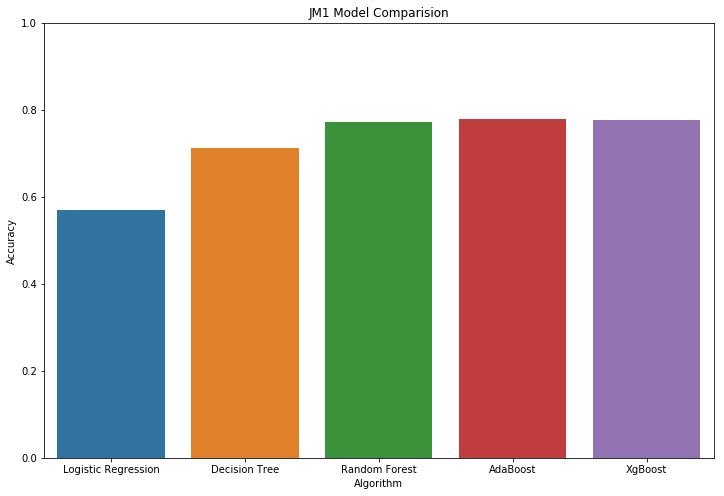

In [164]:
plt.figure(figsize=(12,8))
fig=sns.barplot(algorithms, list(accuracy.values())[0])
plt.ylim((0,1))
fig.set(xlabel='Algorithm', ylabel='Accuracy', title='JM1 Model Comparision')
#plt.savefig('D:\\YMTS0297\\IEEE\\Software bug prediction\\Vizualizations\\jm1_model2.png')
plt.show(fig)

##### CM1 Model comparision

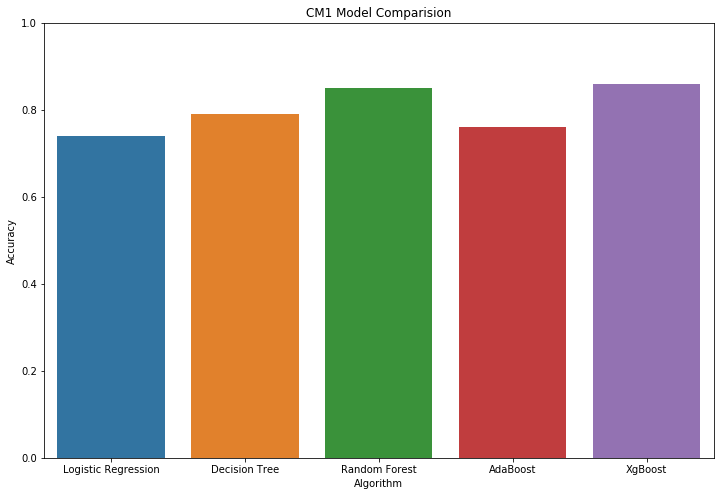

In [165]:
plt.figure(figsize=(12,8))
fig=sns.barplot(algorithms, list(accuracy.values())[1])
plt.ylim((0,1))
fig.set(xlabel='Algorithm', ylabel='Accuracy', title='CM1 Model Comparision')
#plt.savefig('D:\\YMTS0297\\IEEE\\Software bug prediction\\Vizualizations\\cm1_model2.png')
plt.show(fig)

##### KC2 Model comparision

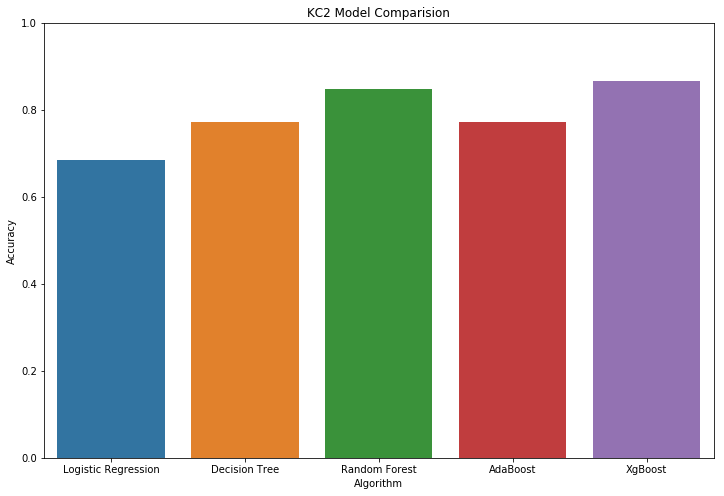

In [166]:
plt.figure(figsize=(12,8))
fig=sns.barplot(algorithms, list(accuracy.values())[2])
plt.ylim((0,1))
fig.set(xlabel='Algorithm', ylabel='Accuracy', title='KC2 Model Comparision')
#plt.savefig('D:\\YMTS0297\\IEEE\\Software bug prediction\\Vizualizations\\kc2_model2.png')
plt.show(fig)

##### PC3 Model comparision

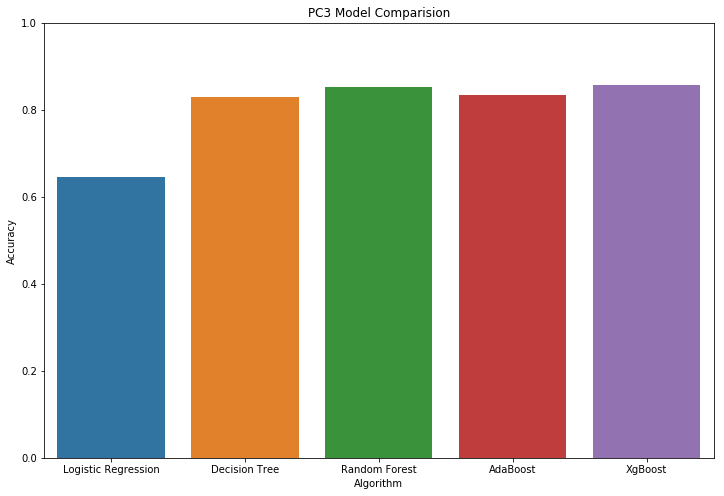

In [167]:
plt.figure(figsize=(12,8))
fig=sns.barplot(algorithms, list(accuracy.values())[3])
plt.ylim((0,1))
fig.set(xlabel='Algorithm', ylabel='Accuracy', title='PC3 Model Comparision')
#plt.savefig('D:\\YMTS0297\\IEEE\\Software bug prediction\\Vizualizations\\pc3_model2.png')
plt.show(fig)

In [168]:
condensed=pd.DataFrame(accuracy).T
condensed.columns=algorithms
condensed

,Logistic Regression,Decision Tree,Random Forest,AdaBoost,XgBoost
jm1,0.570772,0.712776,0.772978,0.778952,0.777114
cm1,0.740000,0.790000,0.850000,0.760000,0.860000
kc2,0.685714,0.771429,0.847619,0.771429,0.866667
pc3,0.645367,0.830671,0.853035,0.833866,0.856230


### Prediction(s) using XgBoost only

#### For jm1 dataset 

In [184]:
#Scaled values of X (i.e., not including target variable)
a=[0.165213, 0.210271, 0.210271, 0.210271, 0.195252, 0.195252, 0.1952515, 0.195252, 0.195252, 0.195252, 0.195252, 0.195252, 0.300387, 0.300387,0.300387, 0.300387, 0.180232, 0.180232, 0.180232, 0.180232, 0.210271]

#main dataset
loc="D:\\YMTS0297\\IEEE\\Novel XgBoost tuned Machine Learning Model for Software Bug Detection\\Datasets\\jm1.csv"
df=load_data(loc)

#prediction code
model_xgb_1.predict(pd.DataFrame([a], columns=df.columns[:-1]))



array([0])